##  LEMI Example

Recived from Andy Frassetto via email, 10 May, 2022.
_______________________
Karl,

Here's one candidate. PASSCAL test set from fall 2020 in the Magdalena
mountains, so...should be fairly quiet.

Cheers, A


The data recieved were from a single station, and sit in a folder called 
DATA0110.  In general, it is recommended to group the LEMI files like this, in one folder per station.

Within a station folder, there can be many files.

Every file is associated with exactly one run.
However, some runs are associated with more than one file.

Therefore it is desireable to group the files according to their runs.

We could do this with subfolders, but in this example we use a dataframe


We can take advantage of the highly regular LEMI filename structure, 
which is if the form YYYYMMDDhhmm.TXT
i.e. LEMI files start on the UTC minute.

Thus we can easily sort these, and determine, based on filename _only_ whether the data are contiguous or not
202009302021.TXT
YYYYMMDDHHMM.TXT




In [67]:
import os
import pandas as pd
from pathlib import Path
#from string import zfill

from aurora.test_utils.synthetic.synthetic_station_config import make_filters

from mth5 import read_file
from mth5 import mth5
from mth5.io.lemi424_new import LEMI424

from mt_metadata import timeseries as metadata
from mt_metadata.utils.mttime import MTime

FILTERS = make_filters()
#print(FILTERS)

### Define path to the data

The original data dump was in a folder called DATA0110.


In [2]:
survey_dir = Path(r"/home/kkappler/software/irismt/aurora/tests/LEMI/")
cmd = f"ls {survey_dir}"
print("Survey Directory Contents")
os.system(cmd)

Survey Directory Contents
DATA0110
from_lemi424.mth5
lemi_reader_test.py
magdelena.h5
out.png
process_lemi.py
sample.json
stations
test_read_multiple_lemi.py


0

Let's make a _stations_ folder to better emulate how the data would be stored in a survey directory

In [3]:
stations_dir = survey_dir.joinpath("stations")
stations_dir.mkdir(exist_ok=True)


In [4]:
os.system(cmd)

DATA0110
from_lemi424.mth5
lemi_reader_test.py
magdelena.h5
out.png
process_lemi.py
sample.json
stations
test_read_multiple_lemi.py


0

Now in the stations folder, let's create a symlink to DATA0110.
Give the station a name, like 53

In [5]:
original_station_dir = survey_dir.joinpath("DATA0110")
symlink_path = stations_dir.joinpath("station_53")
cmd = f"ln -s {original_station_dir} {symlink_path}"
#cmd = f"ln -s {symlink_path} {original_station_dir}"
print(cmd)
os.system(cmd)

ln -s /home/kkappler/software/irismt/aurora/tests/LEMI/DATA0110 /home/kkappler/software/irismt/aurora/tests/LEMI/stations/station_53


ln: failed to create symbolic link '/home/kkappler/software/irismt/aurora/tests/LEMI/stations/station_53/DATA0110': File exists


256

In [6]:
os.system(f"ls {symlink_path}")

202009302021.TXT
202009302029.TXT
202009302054.TXT
202009302112.TXT
202009302114.TXT
202010010000.TXT
202010020000.TXT
202010030000.TXT
202010040000.TXT
202010050000.TXT
202010060000.TXT
202010070000.TXT
DATA0110
readme


0

In [7]:
p = symlink_path.glob("*.TXT")
files_list = [x for x in p if x.is_file()]
files_list.sort() #Important: List is sorted so the files are sequential. We leverage this property

print("FILES:\n")
for file in files_list:
    print(file)



FILES:

/home/kkappler/software/irismt/aurora/tests/LEMI/stations/station_53/202009302021.TXT
/home/kkappler/software/irismt/aurora/tests/LEMI/stations/station_53/202009302029.TXT
/home/kkappler/software/irismt/aurora/tests/LEMI/stations/station_53/202009302054.TXT
/home/kkappler/software/irismt/aurora/tests/LEMI/stations/station_53/202009302112.TXT
/home/kkappler/software/irismt/aurora/tests/LEMI/stations/station_53/202009302114.TXT
/home/kkappler/software/irismt/aurora/tests/LEMI/stations/station_53/202010010000.TXT
/home/kkappler/software/irismt/aurora/tests/LEMI/stations/station_53/202010020000.TXT
/home/kkappler/software/irismt/aurora/tests/LEMI/stations/station_53/202010030000.TXT
/home/kkappler/software/irismt/aurora/tests/LEMI/stations/station_53/202010040000.TXT
/home/kkappler/software/irismt/aurora/tests/LEMI/stations/station_53/202010050000.TXT
/home/kkappler/software/irismt/aurora/tests/LEMI/stations/station_53/202010060000.TXT
/home/kkappler/software/irismt/aurora/tests/LE

### Make a list of LEMI424 objects, one per file

In [8]:
l424_list = [LEMI424(fn=x) for x in files_list]

### Read in the data

In [9]:
for l424 in l424_list:
    l424.read()

In [10]:
L0 = l424_list[0]
print(L0.fn[0].stem)
print(L0.start)
print(L0.end)


202009302021
2020-09-30T20:21:00
2020-09-30T20:28:15


#### Now info can be accessed via data frame

In [11]:
columns = ["year", "month", "day", "hour", "minute", "second", "bx", "by", "bz", 'e1', 'e2', 'e3', 'e4',"latitude", "longitude"]
#columns = ["year", "month", "day", "hour", "minute", "second", "hx", "hy", "hz", 'ex', 'ey', 'e3', 'e4',"latitude", "longitude"]

l424_list[0]._df[columns][0:5]

,year,month,day,hour,minute,second,bx,by,bz,e1,e2,e3,e4,latitude,longitude
0,2020,9,30,20,21,0,23813.621,729.816,41802.042,131.013,-111.026,164.166,9.715,3404.83911,10712.84475
1,2020,9,30,20,21,1,23813.586,729.842,41802.030,130.917,-111.204,164.061,9.540,3404.83911,10712.84473
2,2020,9,30,20,21,2,23813.553,729.875,41802.058,130.918,-111.227,164.071,9.521,3404.83910,10712.84470
3,2020,9,30,20,21,3,23813.477,729.878,41802.042,130.918,-111.396,164.060,9.357,3404.83910,10712.84468
4,2020,9,30,20,21,4,23813.449,729.908,41802.034,131.018,-111.326,164.170,9.428,3404.83909,10712.84467


In [12]:
l424_list[0]._df.columns

Index(['year', 'month', 'day', 'hour', 'minute', 'second', 'bx', 'by', 'bz',
       'temperature_e', 'temperature_h', 'e1', 'e2', 'e3', 'e4', 'battery',
       'elevation', 'latitude', 'lat_hemisphere', 'longitude',
       'lon_hemisphere', 'n_satellites', 'gps_fix', 'tdiff'],
      dtype='object')

In [13]:
l424_list[0]._df[0:5]

,year,month,day,hour,minute,second,bx,by,bz,temperature_e,...,e4,battery,elevation,latitude,lat_hemisphere,longitude,lon_hemisphere,n_satellites,gps_fix,tdiff
0,2020,9,30,20,21,0,23813.621,729.816,41802.042,39.76,...,9.715,13.01,2204.5,3404.83911,N,10712.84475,W,12,2,0
1,2020,9,30,20,21,1,23813.586,729.842,41802.030,39.76,...,9.540,13.01,2204.5,3404.83911,N,10712.84473,W,12,2,0
2,2020,9,30,20,21,2,23813.553,729.875,41802.058,39.75,...,9.521,13.01,2204.6,3404.83910,N,10712.84470,W,12,2,0
3,2020,9,30,20,21,3,23813.477,729.878,41802.042,39.81,...,9.357,13.01,2204.7,3404.83910,N,10712.84468,W,12,2,0
4,2020,9,30,20,21,4,23813.449,729.908,41802.034,39.77,...,9.428,13.01,2204.7,3404.83909,N,10712.84467,W,12,2,0


In [14]:
l424_list[0]._df[-5:]

,year,month,day,hour,minute,second,bx,by,bz,temperature_e,...,e4,battery,elevation,latitude,lat_hemisphere,longitude,lon_hemisphere,n_satellites,gps_fix,tdiff
431,2020,9,30,20,28,11,23784.690,215.653,41830.503,42.52,...,11.650,13.01,2204.8,3404.83945,N,10712.84481,W,12,2,0
432,2020,9,30,20,28,12,23784.723,215.637,41830.472,42.54,...,12.193,13.01,2204.8,3404.83946,N,10712.84481,W,12,2,0
433,2020,9,30,20,28,13,23784.766,215.619,41830.441,42.54,...,12.816,13.01,2204.8,3404.83948,N,10712.84479,W,12,2,0
434,2020,9,30,20,28,14,23784.856,215.601,41830.441,42.58,...,13.345,13.00,2204.8,3404.83949,N,10712.84479,W,12,2,0
435,2020,9,30,20,28,15,23784.928,215.573,41830.445,42.57,...,13.817,13.00,2204.7,3404.83950,N,10712.84478,W,12,2,0


## Figure out which files are part of contiguous runs

We will do this with a helper dataframe.  The dataframe will have the following columns

In [15]:
COLUMNS = ["file_path",
           "first_sample_time", 
           "last_sample_time", 
           "num_lines", 
           "run_id", 
           "sample_rate",
           "new_run",
           "file_base"]


And the same number of rows as there are files

In [16]:
n_files = len(files_list)
n_files
#start, end are first and last sampe time respectivel

12

The data frame will be built from a dictionary, which we initialize here

In [17]:
data_dict = {}
for col in COLUMNS:
    data_dict[col] = n_files * [None]

And populate here:

In [18]:
for i_file in range(n_files):
    data_dict["file_path"][i_file] = files_list[i_file]
    data_dict["first_sample_time"][i_file] = pd.Timestamp(l424_list[i_file].start)
    data_dict["last_sample_time"][i_file] = pd.Timestamp(l424_list[i_file].end)
    data_dict["num_lines"][i_file] = len(l424_list[i_file]._df)
    data_dict["run_id"][i_file] = ""
    data_dict["sample_rate"][i_file] = l424_list[i_file].sample_rate
    data_dict["new_run"][i_file] = True
    data_dict["file_base"][i_file] = files_list[i_file].name
    

And finally, build the dataframe

In [19]:
station_data_df = pd.DataFrame(data=data_dict)
station_data_df[COLUMNS[1:]]

,first_sample_time,last_sample_time,num_lines,run_id,sample_rate,new_run,file_base
0,2020-09-30 20:21:00,2020-09-30 20:28:15,436,,1.0,True,202009302021.TXT
1,2020-09-30 20:29:00,2020-09-30 20:42:16,797,,1.0,True,202009302029.TXT
2,2020-09-30 20:54:00,2020-09-30 21:11:01,1022,,1.0,True,202009302054.TXT
3,2020-09-30 21:12:00,2020-09-30 21:13:45,106,,1.0,True,202009302112.TXT
4,2020-09-30 21:14:00,2020-09-30 23:59:59,9960,,1.0,True,202009302114.TXT
5,2020-10-01 00:00:00,2020-10-01 23:59:59,86400,,1.0,True,202010010000.TXT
6,2020-10-02 00:00:00,2020-10-02 23:59:59,86400,,1.0,True,202010020000.TXT
7,2020-10-03 00:00:00,2020-10-03 23:59:59,86400,,1.0,True,202010030000.TXT
8,2020-10-04 00:00:00,2020-10-04 23:59:59,86400,,1.0,True,202010040000.TXT
9,2020-10-05 00:00:00,2020-10-05 23:59:59,86400,,1.0,True,202010050000.TXT


Here is some logic we will wrap as a function to figure out which files are part of a contiguous run

In [68]:
"""
Builds the boolean valued column "new run".
True when there is a gap between the data of the row under consideration and False if contiguous
"""

new_run = n_files * [True]
for i_row, row in station_data_df.iterrows():
    if i_row == 0:
        pass
    else:
        #Check of sample rate changed
        previous = station_data_df.loc[i_row-1]
        if previous.sample_rate != row.sample_rate:
            print("CHANGED SAMPLE RATE")
            new_run[i_row] = True
            continue
            
            
        #check for continuity with previous
        dt = pd.Timedelta(seconds=1./previous.sample_rate)
        previous_next_sample = previous.last_sample_time + dt

        if row.first_sample_time == previous_next_sample:
            print("SAME RUN")
            new_run[i_row] = False
            continue
                                                                                            
station_data_df["new_run"] = new_run    
station_data_df[COLUMNS[1:]]
    

SAME RUN
SAME RUN
SAME RUN
SAME RUN
SAME RUN
SAME RUN
SAME RUN


,first_sample_time,last_sample_time,num_lines,run_id,sample_rate,new_run,file_base
0,2020-09-30 20:21:00,2020-09-30 20:28:15,436,001,1.0,True,202009302021.TXT
1,2020-09-30 20:29:00,2020-09-30 20:42:16,797,002,1.0,True,202009302029.TXT
2,2020-09-30 20:54:00,2020-09-30 21:11:01,1022,003,1.0,True,202009302054.TXT
3,2020-09-30 21:12:00,2020-09-30 21:13:45,106,004,1.0,True,202009302112.TXT
4,2020-09-30 21:14:00,2020-09-30 23:59:59,9960,005,1.0,True,202009302114.TXT
5,2020-10-01 00:00:00,2020-10-01 23:59:59,86400,005,1.0,False,202010010000.TXT
6,2020-10-02 00:00:00,2020-10-02 23:59:59,86400,005,1.0,False,202010020000.TXT
7,2020-10-03 00:00:00,2020-10-03 23:59:59,86400,005,1.0,False,202010030000.TXT
8,2020-10-04 00:00:00,2020-10-04 23:59:59,86400,005,1.0,False,202010040000.TXT
9,2020-10-05 00:00:00,2020-10-05 23:59:59,86400,005,1.0,False,202010050000.TXT


Now all the rows that have True in column "new_run" are separate runs.

All the columns that are false should recursively look upward until they find a True value to see the file with the start of the run they belong to.

Next step is to issue some run labels.  Here we will use a scheme like:
001
002
...


So call the first run 001

In [21]:
run_id_int = 1
run_id_str = str(run_id_int).zfill(3)
run_id_str

'001'


Initialize a container for the labels (run_id) column

In [22]:
run_ids = n_files * [""]
run_ids[0] = run_id_str

And populate it

In [23]:
for i_row, row in station_data_df.iterrows():
    if i_row==0:
        run_ids[i_row] = run_id_str
        continue
    if row.new_run:
        run_id_int += 1
        run_id_str = str(run_id_int).zfill(3)
    run_ids[i_row] = run_id_str
print(run_ids)

['001', '002', '003', '004', '005', '005', '005', '005', '005', '005', '005', '005']


Write it on the dataframe

In [24]:
station_data_df["run_id"] = run_ids
station_data_df[COLUMNS[1:]]

,first_sample_time,last_sample_time,num_lines,run_id,sample_rate,new_run,file_base
0,2020-09-30 20:21:00,2020-09-30 20:28:15,436,001,1.0,True,202009302021.TXT
1,2020-09-30 20:29:00,2020-09-30 20:42:16,797,002,1.0,True,202009302029.TXT
2,2020-09-30 20:54:00,2020-09-30 21:11:01,1022,003,1.0,True,202009302054.TXT
3,2020-09-30 21:12:00,2020-09-30 21:13:45,106,004,1.0,True,202009302112.TXT
4,2020-09-30 21:14:00,2020-09-30 23:59:59,9960,005,1.0,True,202009302114.TXT
5,2020-10-01 00:00:00,2020-10-01 23:59:59,86400,005,1.0,False,202010010000.TXT
6,2020-10-02 00:00:00,2020-10-02 23:59:59,86400,005,1.0,False,202010020000.TXT
7,2020-10-03 00:00:00,2020-10-03 23:59:59,86400,005,1.0,False,202010030000.TXT
8,2020-10-04 00:00:00,2020-10-04 23:59:59,86400,005,1.0,False,202010040000.TXT
9,2020-10-05 00:00:00,2020-10-05 23:59:59,86400,005,1.0,False,202010050000.TXT


The data frame is now ready to act as a reference for packing the mth5

Group by run_id, and for all the files that share the same run_id, pack their paths into a list

In [25]:
grouper = station_data_df.groupby("run_id")

In [26]:
print(len(grouper))
fns = {}#len(grouper) * [None]
for run, grouped_df in grouper:
    print(run)
    #print(grouped_df["run_id"])
    fns[run] = grouped_df["file_path"].to_list()
    #print(grouped_df["file_path"].to_list())

5
001
002
003
004
005


Look at the list (sanity check)

In [27]:
fns

{'001': [PosixPath('/home/kkappler/software/irismt/aurora/tests/LEMI/stations/station_53/202009302021.TXT')],
 '002': [PosixPath('/home/kkappler/software/irismt/aurora/tests/LEMI/stations/station_53/202009302029.TXT')],
 '003': [PosixPath('/home/kkappler/software/irismt/aurora/tests/LEMI/stations/station_53/202009302054.TXT')],
 '004': [PosixPath('/home/kkappler/software/irismt/aurora/tests/LEMI/stations/station_53/202009302112.TXT')],
 '005': [PosixPath('/home/kkappler/software/irismt/aurora/tests/LEMI/stations/station_53/202009302114.TXT'),
  PosixPath('/home/kkappler/software/irismt/aurora/tests/LEMI/stations/station_53/202010010000.TXT'),
  PosixPath('/home/kkappler/software/irismt/aurora/tests/LEMI/stations/station_53/202010020000.TXT'),
  PosixPath('/home/kkappler/software/irismt/aurora/tests/LEMI/stations/station_53/202010030000.TXT'),
  PosixPath('/home/kkappler/software/irismt/aurora/tests/LEMI/stations/station_53/202010040000.TXT'),
  PosixPath('/home/kkappler/software/irismt

Create a dictionary, keyed by run_id, where the value will be a datafull LEMI424 object

In [28]:
lemis = {}

In [29]:
for run_id in fns.keys():
    tmp = LEMI424(fn=fns[run_id]) 
    tmp.read()
    tmp = tmp.to_run_ts()
    tmp.run_metadata.id = run_id
    lemis[run_id] = tmp

In [30]:
lemis["001"]

RunTS Summary:
	Station:     None
	Run:         001
	Start:       2020-09-30T20:21:00+00:00
	End:         2020-09-30T20:28:15+00:00
	Sample Rate: 1.0
	Components:  ['bx', 'by', 'bz', 'e1', 'e2', 'temperature_e', 'temperature_h']

In [31]:
lemis["001"].run_metadata

{
    "run": {
        "channels_recorded_auxiliary": [
            "temperature_e",
            "temperature_h"
        ],
        "channels_recorded_electric": [
            "e1",
            "e2"
        ],
        "channels_recorded_magnetic": [
            "bx",
            "by",
            "bz"
        ],
        "data_logger.firmware.author": null,
        "data_logger.firmware.name": null,
        "data_logger.firmware.version": null,
        "data_logger.id": null,
        "data_logger.manufacturer": null,
        "data_logger.timing_system.drift": 0.0,
        "data_logger.timing_system.type": "GPS",
        "data_logger.timing_system.uncertainty": 0.0,
        "data_logger.type": null,
        "data_type": "BBMT",
        "id": "001",
        "sample_rate": 1.0,
        "time_period.end": "2020-09-30T20:28:15+00:00",
        "time_period.start": "2020-09-30T20:21:00+00:00"
    }
}

In [32]:
type(lemis["001"])

mth5.timeseries.run_ts.RunTS

In [33]:
lemis["001"].dataset


<xarray.Dataset>
Dimensions:        (time: 436)
Coordinates:
  * time           (time) datetime64[ns] 2020-09-30T20:21:00 ... 2020-09-30T2...
Data variables:
    bx             (time) float64 2.381e+04 2.381e+04 ... 2.378e+04 2.378e+04
    by             (time) float64 729.8 729.8 729.9 729.9 ... 215.6 215.6 215.6
    bz             (time) float64 4.18e+04 4.18e+04 ... 4.183e+04 4.183e+04
    e1             (time) float64 131.0 130.9 130.9 130.9 ... 133.8 134.2 134.6
    e2             (time) float64 -111.0 -111.2 -111.2 ... -109.3 -108.7 -108.3
    temperature_e  (time) float64 39.76 39.76 39.75 39.81 ... 42.54 42.58 42.57
    temperature_h  (time) float64 40.48 40.48 40.49 40.49 ... 41.31 41.32 41.32
Attributes:
    channels_recorded_auxiliary:            ['temperature_e', 'temperature_h']
    channels_recorded_electric:             ['e1', 'e2']
    channels_recorded_magnetic:             ['bx', 'by', 'bz']
    data_logger.firmware.author:            None
    data_logger.firmware.name:              None
    data_logger.firmware.version:           None
    data_logger.id:                         None
    data_logger.manufacturer:               None
    data_logger.timing_system.drift:        0.0
    data_logger.timing_system.type:         GPS
    data_logger.timing_system.uncertainty:  0.0
    data_logger.type:                       None
    data_type:                              BBMT
    id:                                     None
    sample_rate:                            1.0
    time_period.end:                        2020-09-30T20:28:15+00:00
    time_period.start:                      2020-09-30T20:21:00+00:00

In [34]:
lemis["005"].dataset


<xarray.Dataset>
Dimensions:        (time: 579947)
Coordinates:
  * time           (time) datetime64[ns] 2020-09-30T21:14:00 ... 2020-10-07T1...
Data variables:
    bx             (time) float64 2.378e+04 2.378e+04 ... 2.378e+04 2.378e+04
    by             (time) float64 213.9 213.9 213.9 213.9 ... 247.2 247.3 247.3
    bz             (time) float64 4.183e+04 4.183e+04 ... 4.184e+04 4.184e+04
    e1             (time) float64 134.8 134.9 135.0 135.1 ... 130.4 130.3 130.2
    e2             (time) float64 -109.8 -109.9 -109.9 ... -40.88 -40.95 -40.93
    temperature_e  (time) float64 46.5 46.46 46.47 46.47 ... 18.18 18.17 18.17
    temperature_h  (time) float64 36.3 36.3 36.3 36.3 ... 19.61 19.6 19.6 19.6
Attributes:
    channels_recorded_auxiliary:            ['temperature_e', 'temperature_h']
    channels_recorded_electric:             ['e1', 'e2']
    channels_recorded_magnetic:             ['bx', 'by', 'bz']
    data_logger.firmware.author:            None
    data_logger.firmware.name:              None
    data_logger.firmware.version:           None
    data_logger.id:                         None
    data_logger.manufacturer:               None
    data_logger.timing_system.drift:        0.0
    data_logger.timing_system.type:         GPS
    data_logger.timing_system.uncertainty:  0.0
    data_logger.type:                       None
    data_type:                              BBMT
    id:                                     None
    sample_rate:                            1.0
    time_period.end:                        2020-10-07T14:19:46+00:00
    time_period.start:                      2020-09-30T21:14:00+00:00

In [35]:
lemis["005"].run_metadata

{
    "run": {
        "channels_recorded_auxiliary": [
            "temperature_e",
            "temperature_h"
        ],
        "channels_recorded_electric": [
            "e1",
            "e2"
        ],
        "channels_recorded_magnetic": [
            "bx",
            "by",
            "bz"
        ],
        "data_logger.firmware.author": null,
        "data_logger.firmware.name": null,
        "data_logger.firmware.version": null,
        "data_logger.id": null,
        "data_logger.manufacturer": null,
        "data_logger.timing_system.drift": 0.0,
        "data_logger.timing_system.type": "GPS",
        "data_logger.timing_system.uncertainty": 0.0,
        "data_logger.type": null,
        "data_type": "BBMT",
        "id": "005",
        "sample_rate": 1.0,
        "time_period.end": "2020-10-07T14:19:46+00:00",
        "time_period.start": "2020-09-30T21:14:00+00:00"
    }
}


### We have run time series, now let's pack it into an mth5

In [36]:
h5_fn = "magdelena.h5"
station_id = "0110"

In [37]:
# write some simple metadata for the survey
survey = metadata.Survey()
survey.acquired_by.author = "MT Meister"
survey.archive_id = "LEMI_TEST_01"
survey.archive_network = "MT"
survey.name = "magdelena"

In [38]:
m = mth5.MTH5(file_version="0.1.0")
m.open_mth5(h5_fn, "w")


2022-07-31 18:17:56,920 [line 591] mth5.mth5.MTH5.open_mth5 - WARNING: magdelena.h5 will be overwritten in 'w' mode
2022-07-31 18:17:57,344 [line 656] mth5.mth5.MTH5._initialize_file - INFO: Initialized MTH5 0.1.0 file magdelena.h5 in mode w


In [39]:
# add survey metadata
survey_group = m.survey_group
survey_group.metadata.update(survey)
survey_group.write_metadata()

In [40]:
# initialize a station
station_group = m.add_station(station_id)
print("Station was just initialized")
station_group.validate_station_metadata()

Station was just initialized


In [41]:
for run, run_ts in lemis.items():
    run_group = station_group.add_run(run_ts.run_metadata.id, run_metadata=run_ts.run_metadata)
    
    # add data to the run group
    channels = run_group.from_runts(run_ts)

    # validate run metadata
    run_group.validate_run_metadata()

    # update station metadata to ensure consistency
    station_group.validate_station_metadata()

survey_group.update_survey_metadata()




In [42]:
fltr = FILTERS["1x"]
fltr

{
    "coefficient_filter": {
        "calibration_date": "1980-01-01",
        "gain": 1.0,
        "name": "1",
        "type": "coefficient",
        "units_in": "unknown",
        "units_out": "unknown"
    }
}

In [43]:
m.filters_group.add_filter(fltr)

<HDF5 group "/Survey/Filters/coefficient/1" (0 members)>

In [44]:
m.close_mth5()

2022-07-31 18:18:56,304 [line 731] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing magdelena.h5


In [45]:
mm = mth5.MTH5(file_version="0.1.0")
mm.open_mth5(h5_fn, "a")


In [46]:
mm

/:
    |- Group: Survey
    ----------------
        |- Group: Filters
        -----------------
            |- Group: coefficient
            ---------------------
                |- Group: 1
                -----------
            |- Group: fap
            -------------
            |- Group: fir
            -------------
            |- Group: time_delay
            --------------------
            |- Group: zpk
            -------------
        |- Group: Reports
        -----------------
        |- Group: Standards
        -------------------
            --> Dataset: summary
            ......................
        |- Group: Stations
        ------------------
            |- Group: 0110
            --------------
                |- Group: 001
                -------------
                    --> Dataset: bx
                    .................
                    --> Dataset: by
                    .................
                    --> Dataset: bz
                    .........

In [47]:
mm.close_mth5()

2022-07-31 18:18:56,643 [line 731] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing magdelena.h5


### Try Processing the Data

In [48]:
from aurora.config import BANDS_DEFAULT_FILE
from aurora.config.config_creator import ConfigCreator
from aurora.pipelines.process_mth5 import process_mth5
from aurora.transfer_function.kernel_dataset import KernelDataset
from aurora.pipelines.run_summary import RunSummary

from mth5.utils.helpers import initialize_mth5


In [49]:
from aurora.channel_nomenclature import get_channel_map

In [50]:
mth5_object = initialize_mth5(h5_fn)

In [51]:
channel_summary_df = mth5_object.channel_summary.to_dataframe()
channel_summary_df

,survey,station,run,latitude,longitude,elevation,component,start,end,n_samples,sample_rate,measurement_type,azimuth,tilt,units,hdf5_reference,run_hdf5_reference,station_hdf5_reference
0,none,0110,001,0.0,0.0,0.0,bx,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,436,1.0,magnetic,0.0,0.0,none,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
1,none,0110,001,0.0,0.0,0.0,by,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,436,1.0,magnetic,0.0,0.0,none,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
2,none,0110,001,0.0,0.0,0.0,bz,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,436,1.0,magnetic,0.0,0.0,none,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
3,none,0110,001,0.0,0.0,0.0,e1,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,436,1.0,electric,0.0,0.0,none,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
4,none,0110,001,0.0,0.0,0.0,e2,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,436,1.0,electric,0.0,0.0,none,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
5,none,0110,001,0.0,0.0,0.0,temperature_e,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,436,1.0,auxiliary,0.0,0.0,none,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
6,none,0110,001,0.0,0.0,0.0,temperature_h,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,436,1.0,auxiliary,0.0,0.0,none,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
7,none,0110,002,0.0,0.0,0.0,bx,2020-09-30 20:29:00+00:00,2020-09-30 20:42:16+00:00,797,1.0,magnetic,0.0,0.0,none,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
8,none,0110,002,0.0,0.0,0.0,by,2020-09-30 20:29:00+00:00,2020-09-30 20:42:16+00:00,797,1.0,magnetic,0.0,0.0,none,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
9,none,0110,002,0.0,0.0,0.0,bz,2020-09-30 20:29:00+00:00,2020-09-30 20:42:16+00:00,797,1.0,magnetic,0.0,0.0,none,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>


In [52]:
run_summary = RunSummary()
run_summary.from_mth5s([mth5_object,])
run_summary.df

,survey,station_id,run_id,start,end,sample_rate,input_channels,output_channels,channel_scale_factors,mth5_path
0,none,0110,001,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,1.0,[],[],"{'bx': 1.0, 'by': 1.0, 'bz': 1.0, 'e1': 1.0, '...",magdelena.h5
1,none,0110,002,2020-09-30 20:29:00+00:00,2020-09-30 20:42:16+00:00,1.0,[],[],"{'bx': 1.0, 'by': 1.0, 'bz': 1.0, 'e1': 1.0, '...",magdelena.h5
2,none,0110,003,2020-09-30 20:54:00+00:00,2020-09-30 21:11:01+00:00,1.0,[],[],"{'bx': 1.0, 'by': 1.0, 'bz': 1.0, 'e1': 1.0, '...",magdelena.h5
3,none,0110,004,2020-09-30 21:12:00+00:00,2020-09-30 21:13:45+00:00,1.0,[],[],"{'bx': 1.0, 'by': 1.0, 'bz': 1.0, 'e1': 1.0, '...",magdelena.h5
4,none,0110,005,2020-09-30 21:14:00+00:00,2020-10-07 14:19:46+00:00,1.0,[],[],"{'bx': 1.0, 'by': 1.0, 'bz': 1.0, 'e1': 1.0, '...",magdelena.h5


In [53]:
run_summary.mini_summary

,survey,station_id,run_id,start,end
0,none,0110,001,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00
1,none,0110,002,2020-09-30 20:29:00+00:00,2020-09-30 20:42:16+00:00
2,none,0110,003,2020-09-30 20:54:00+00:00,2020-09-30 21:11:01+00:00
3,none,0110,004,2020-09-30 21:12:00+00:00,2020-09-30 21:13:45+00:00
4,none,0110,005,2020-09-30 21:14:00+00:00,2020-10-07 14:19:46+00:00


In [54]:
kernel_dataset = KernelDataset()
kernel_dataset.from_run_summary(run_summary, "0110")
kernel_dataset.mini_summary

,survey,station_id,run_id,start,end
0,none,0110,001,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00
1,none,0110,002,2020-09-30 20:29:00+00:00,2020-09-30 20:42:16+00:00
2,none,0110,003,2020-09-30 20:54:00+00:00,2020-09-30 21:11:01+00:00
3,none,0110,004,2020-09-30 21:12:00+00:00,2020-09-30 21:13:45+00:00
4,none,0110,005,2020-09-30 21:14:00+00:00,2020-10-07 14:19:46+00:00


In [55]:
station_runs_dict = {}
station_runs_dict["0110"] = ["005", ]
keep_or_drop = "keep"

kernel_dataset.select_station_runs(station_runs_dict, keep_or_drop)
kernel_dataset.mini_summary

,survey,station_id,run_id,start,end
0,none,0110,005,2020-09-30 21:14:00+00:00,2020-10-07 14:19:46+00:00


In [56]:
sample_rates = kernel_dataset.df.sample_rate.unique()
print(f"sample_rates = {sample_rates}")
if len(sample_rates)==1:
    sample_rate = sample_rates[0]


sample_rates = [ 1.]


In [60]:
cc = ConfigCreator()#config_path=CONFIG_PATH)
config = cc.create_run_processing_object(emtf_band_file=BANDS_DEFAULT_FILE,
                                    sample_rate=sample_rate, 
                                         input_channels=["bx", "by"],
                                        output_channels=["bz", "e1", "e2"],
                                    )
config.stations.from_dataset_dataframe(kernel_dataset.df)
for decimation in config.decimations:
    decimation.estimator.engine = "RME"

In [61]:
config.channel_nomenclature = "LEMI12"

In [60]:
run1 = mth5_object.get_run("0110","001")

In [61]:
qq = run1.to_runts()

Processing config indicates 4 decimation levels 
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
Processing band 25.728968s
Processing band 19.929573s
Processing band 15.164131s
Processing band 11.746086s
Processing band 9.195791s
Processing band 7.362526s
Processing band 5.856115s
Processing band 4.682492s
GET PLOTTER FROM MTpy


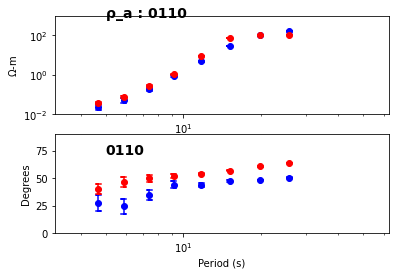

WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
Processing band 102.915872s
Processing band 85.631182s
Processing band 68.881694s
Processing band 54.195827s
Processing band 43.003958s
Processing band 33.310722s
GET PLOTTER FROM MTpy


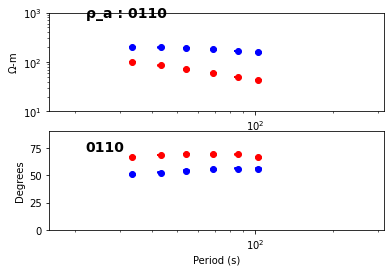

WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
Processing band 411.663489s
Processing band 342.524727s
Processing band 275.526776s
Processing band 216.783308s
Processing band 172.015831s
Processing band 133.242890s
GET PLOTTER FROM MTpy


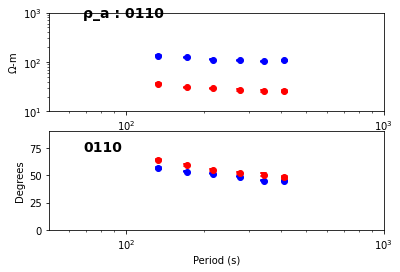

WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
Processing band 1514.701336s
Processing band 1042.488956s
Processing band 723.371271s
Processing band 532.971560s
Processing band 412.837995s
GET PLOTTER FROM MTpy


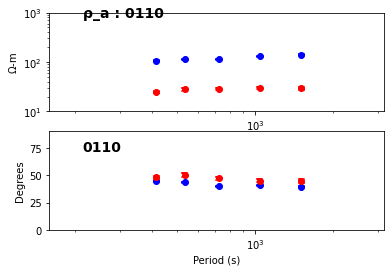

2022-07-31 18:21:37,589 [line 731] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing magdelena.h5


In [62]:
show_plot = True
tf_cls = process_mth5(config,
                    kernel_dataset,
                    units="MT",
                    show_plot=show_plot,
                    z_file_path=None,
                    return_collection=False
                )

In [64]:
mth5_object.close_mth5()

2022-07-31 18:22:14,653 [line 731] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing magdelena.h5


In [66]:
xml_file_name = "magdelena.xml"
#xml_file_name = AURORA_RESULTS_PATH.joinpath(xml_file_base)
tf_cls.write_tf_file(fn=xml_file_name, file_type="emtfxml", channel_nomenclature="LEMI12")

2022-07-31 18:23:12,034 [line 197] mt_metadata.transfer_functions.io.readwrite.write_file - INFO: Wrote magdelena.xml


EMTFXML(station='0110', latitude=0.00, longitude=0.00, elevation=0.00)